# Task 3: IRIS Flower Classification Using Decision Tree Classifier
Build a machine learning model to classify Iris flowers into their respective species based on sepal and petal measurements. Use the Decision Tree classifier for this task and visualize the results using a scatter plot.

Load necessary libraries

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

Load the dataset IRIS

In [22]:
iris_data = pd.read_csv('IRIS.csv')

Extract features and target variable

In [23]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_data['species'].values
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['species_code'] = iris_data['species'].map(species_map)

Split data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the features

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize Decision Tree classifier

In [26]:
clf = DecisionTreeClassifier()

Train the model

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Predict on the test set

In [28]:
y_pred = clf.predict(X_test)

Evaluate the model

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


 Calculate accuracy

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Visualize results

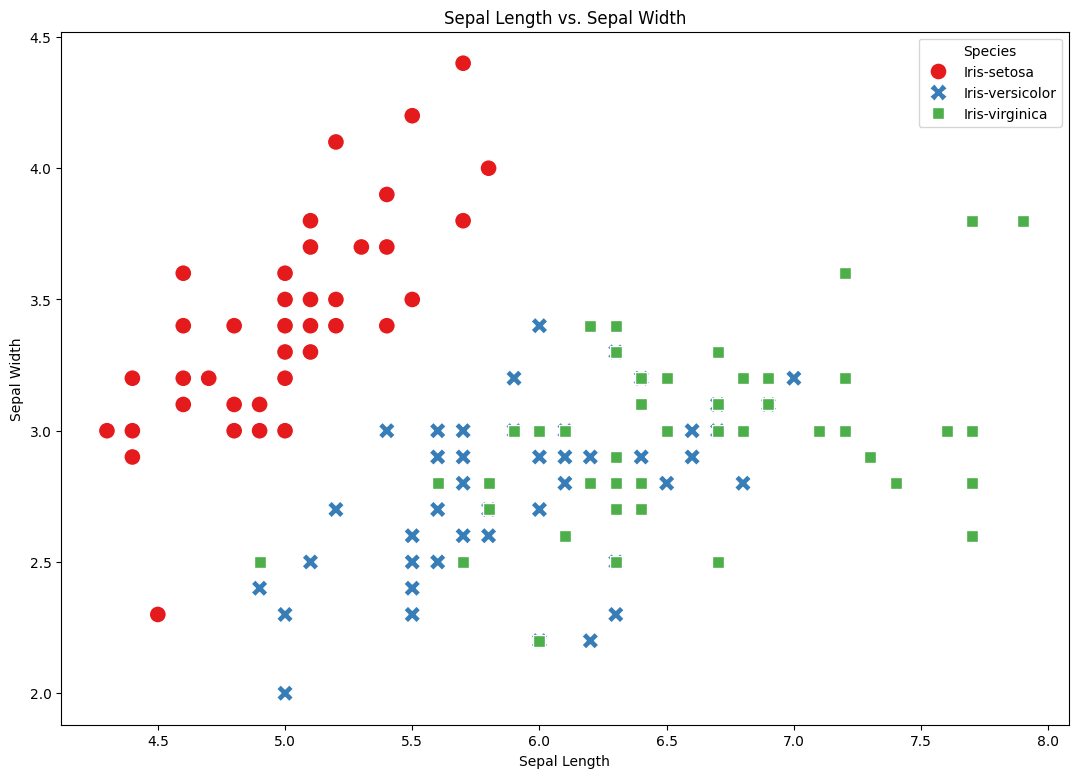

In [31]:
iris_data['predicted_species'] = clf.predict(scaler.transform(X))
plt.figure(figsize=(13, 9))
sns.scatterplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species', style='species', palette='Set1',s=150)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.show()